In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv('fin.csv')
df.head()

,Unnamed: 0,sampling_date,state,location,type,so2,no2,rspm,spm,location_monitoring_station,si,ni,rpi,spi,AQI
0,0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,NaN,6.000,21.750,109.610928,180.52232,180.52232
1,1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,NaN,3.875,8.750,109.610928,180.52232,180.52232
2,2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,NaN,7.750,35.625,109.610928,180.52232,180.52232
3,3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,NaN,7.875,18.375,109.610928,180.52232,180.52232
4,4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,NaN,5.875,9.375,109.610928,180.52232,180.52232


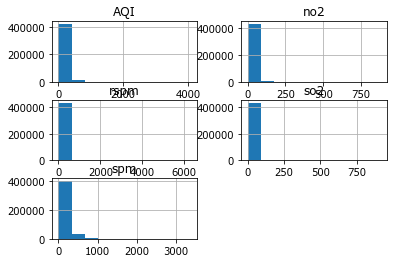

In [4]:
cdf=df[['so2','no2','rspm','spm','AQI']]
cdf.hist()
plt.show()

#### PLOT OF AQI VS SO2 #### 

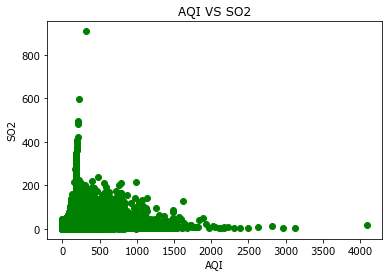

In [5]:
plt.scatter(cdf.AQI,cdf.so2,color='green')
plt.xlabel('AQI')
plt.ylabel('SO2')
plt.title('AQI VS SO2')
plt.show()

#### PLOT OF AQI VS NO2 #### 

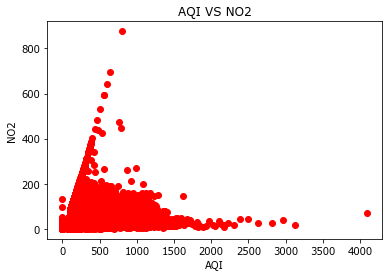

In [6]:
plt.scatter(cdf.AQI,cdf.no2,color='Red')
plt.xlabel('AQI')
plt.ylabel('NO2')
plt.title('AQI VS NO2')
plt.show()


#### PLOT OF AQI VS RSPM #### 

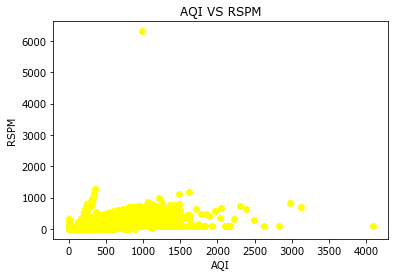

In [7]:
plt.scatter(cdf.AQI,cdf.rspm,color='Yellow')
plt.xlabel('AQI')
plt.ylabel('RSPM')
plt.title('AQI VS RSPM')
plt.show()


#### PLOT OF AQI VS SPM #### 

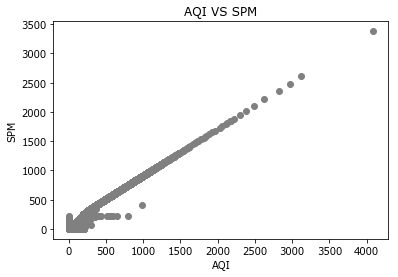

In [8]:
plt.scatter(cdf.AQI,cdf.spm,color='GRAY')
plt.xlabel('AQI')
plt.ylabel('SPM')
plt.title('AQI VS SPM')
plt.show()


Creating a training and testing dataset 
Trainig Data set has 90% data
Testing data set has 10% data

In [9]:
msk = np.random.rand(len(df)) < 0.90
train = cdf[msk]
test = cdf[~msk]


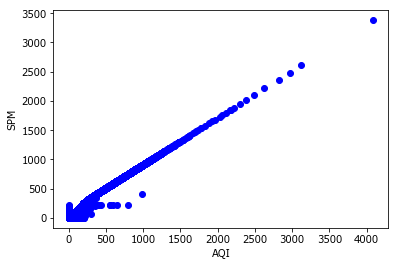

In [10]:
plt.scatter(train.AQI, train.spm, color='blue')
plt.xlabel("AQI")
plt.ylabel("SPM")
plt.show()

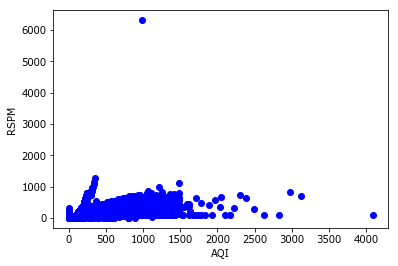

In [11]:
plt.scatter(train.AQI, train.rspm, color='blue')
plt.xlabel("AQI")
plt.ylabel("RSPM")
plt.show()

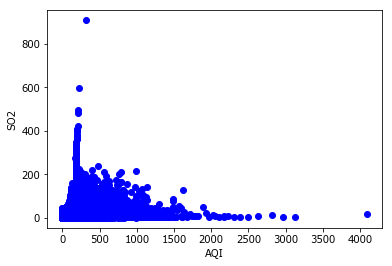

In [12]:
plt.scatter(train.AQI, train.so2, color='blue')
plt.xlabel("AQI")
plt.ylabel("SO2")
plt.show()

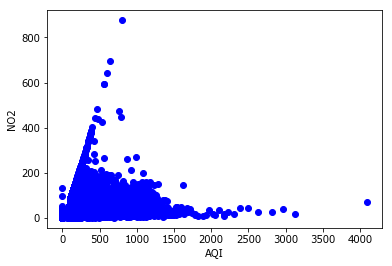

In [13]:
plt.scatter(train.AQI, train.no2, color='blue')
plt.xlabel("AQI")
plt.ylabel("NO2")
plt.show()

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AQI']])
train_y = np.asanyarray(train[['so2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.0105177]]
Intercept:  [8.8314356]


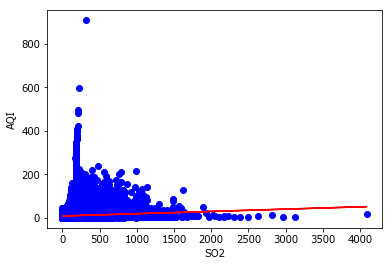

In [15]:
plt.scatter(train.AQI, train.so2, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SO2")
plt.ylabel("AQI")
plt.show()

In [16]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['AQI']])
test_y = np.asanyarray(test[['so2']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 6.20
Residual sum of squares (MSE): 119.93
R2-score: -103.54


In [17]:
y_hat= regr.predict(test[['so2']])
x = np.asanyarray(test[['AQI']])
y = np.asanyarray(test[['so2']])
print("Residual sum of squares: %.2f"
% np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 122.17
Variance score: 0.01


In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AQI']])
train_y = np.asanyarray(train[['no2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.0411014]]
Intercept:  [18.00755999]


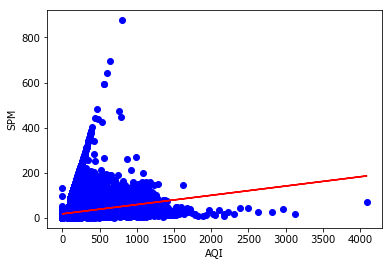

In [19]:
plt.scatter(train.AQI, train.no2, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("AQI")
plt.ylabel("SPM")
plt.show()

In [20]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['AQI']])
test_y = np.asanyarray(test[['no2']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 11.78
Residual sum of squares (MSE): 304.03
R2-score: -16.35


In [21]:
y_hat= regr.predict(test[['no2']])
x = np.asanyarray(test[['AQI']])
y = np.asanyarray(test[['no2']])
print("Residual sum of squares: %.2f"
% np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 342.19
Variance score: 0.05


In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AQI']])
train_y = np.asanyarray(train[['spm']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.97958329]]
Intercept:  [35.12270916]


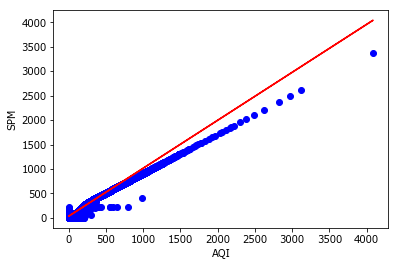

In [23]:
plt.scatter(train.AQI, train.spm, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("AQI")
plt.ylabel("SPM")
plt.show()

In [24]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['AQI']])
test_y = np.asanyarray(test[['spm']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 14.69
Residual sum of squares (MSE): 494.43
R2-score: 0.95


In [25]:
y_hat= regr.predict(test[['spm']])
x = np.asanyarray(test[['AQI']])
y = np.asanyarray(test[['spm']])
print("Residual sum of squares: %.2f"
% np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 941.37
Variance score: 0.95


In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AQI']])
train_y = np.asanyarray(train[['rspm']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.33545398]]
Intercept:  [45.18947572]


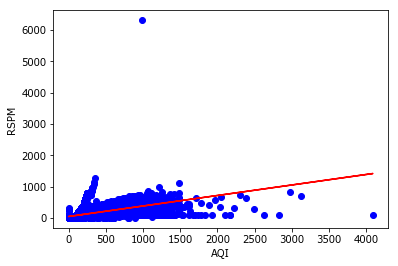

In [27]:
plt.scatter(train.AQI, train.rspm, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("AQI")
plt.ylabel("RSPM")
plt.show()

In [28]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['AQI']])
test_y = np.asanyarray(test[['rspm']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 43.36
Residual sum of squares (MSE): 3936.69
R2-score: -2.37


In [29]:
y_hat= regr.predict(test[['spm']])
x = np.asanyarray(test[['AQI']])
y = np.asanyarray(test[['rspm']])
print("Residual sum of squares: %.2f"
% np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 4087.31
Variance score: 0.23


In [31]:
import pickle 
pickle.dump(regr,open('model.pkl','wb'))